In [80]:
import pandas as pd

# Specify the path to your Excel file
file_path = r"09_Outputs\main_data.xlsx"

# Load the Excel file into a DataFrame using the openpyxl engine
df_main = pd.read_excel(file_path, engine='openpyxl')

# Remove quotation marks from the 'Entity' column
df_main['Entity'] = df_main['Entity'].str.replace('"', '')

# Retrieve unique countries from the DataFrame and store them as a list of strings
all_countries = df_main['Entity'].drop_duplicates().astype(str).tolist()

# Display the first 5 rows of the DataFrame for a quick overview
df_main.head()


,Entity,Year,Code,Annual CO₂ emissions,Renewables (TWh growth - equivalent),Annual CO₂ emissions from flaring,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal,Primary energy consumption (TWh),...,Other renewables excluding bioenergy (TWh),Oil consumption - TWh,Primary energy consumption per GDP (kWh/$),Low-carbon electricity (TWh),GDP (constant 2015 US$),Renewable electricity (% electricity production) (World Bank (2015)),Solar photovoltaic capacity,Annual greenhouse gas emissions in CO2 equivalents,Continent,Electricity from wind (TWh)
0,Afghanistan,1965,AFG,1006917.0,NaN,0.0,0.0,542272.0,381056.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24430504.0,NaN,NaN
1,Afghanistan,1966,AFG,1091159.0,NaN,0.0,0.0,575248.0,428688.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25174948.0,NaN,NaN
2,Afghanistan,1967,AFG,1281865.0,NaN,0.0,260144.0,556928.0,399376.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24644464.0,NaN,NaN
3,Afghanistan,1968,AFG,1223391.0,NaN,0.0,347041.0,496817.0,332429.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24382198.0,NaN,NaN
4,Afghanistan,1969,AFG,941232.0,NaN,0.0,0.0,527616.0,362736.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23233260.0,NaN,NaN


In [76]:
# Example Filter the DataFrame for Germany
germany_df = df_main[df_main['Entity'] == "Germany"]

# Display the DataFrame for Germany
germany_df.head()



,Entity,Year,Code,Annual CO₂ emissions,Renewables (TWh growth - equivalent),Annual CO₂ emissions from flaring,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal,Primary energy consumption (TWh),...,Other renewables excluding bioenergy (TWh),Oil consumption - TWh,Primary energy consumption per GDP (kWh/$),Low-carbon electricity (TWh),GDP (constant 2015 US$),Renewable electricity (% electricity production) (World Bank (2015)),Solar photovoltaic capacity,Annual greenhouse gas emissions in CO2 equivalents,Continent,Electricity from wind (TWh)
3958,Germany,1965,DEU,9.601022e+08,NaN,0.0,5536304.0,217769840.0,716916540.0,2969.2932,...,0.0,1020.56976,2.681068,117.000,NaN,NaN,NaN,1.139718e+09,NaN,NaN
3959,Germany,1966,DEU,9.514220e+08,3.908512,0.0,6679498.0,244283470.0,680103360.0,2977.0010,...,0.0,1141.83220,2.610604,265.000,NaN,NaN,NaN,1.132798e+09,NaN,NaN
3960,Germany,1967,DEU,9.362294e+08,-2.607136,0.0,8775280.0,254376860.0,653866430.0,2969.4314,...,0.0,1187.42160,2.595832,1.225,NaN,NaN,NaN,1.120942e+09,NaN,NaN
3961,Germany,1968,DEU,9.847908e+08,0.729427,0.0,14465526.0,290439040.0,659625100.0,3170.4126,...,0.0,1331.12270,2.632934,1.766,NaN,NaN,NaN,1.175982e+09,NaN,NaN
3962,Germany,1969,DEU,1.052001e+09,-9.419529,0.0,20620992.0,324194400.0,686182900.0,3419.7780,...,0.0,1496.94180,2.663894,4.937,NaN,NaN,NaN,1.253082e+09,NaN,NaN


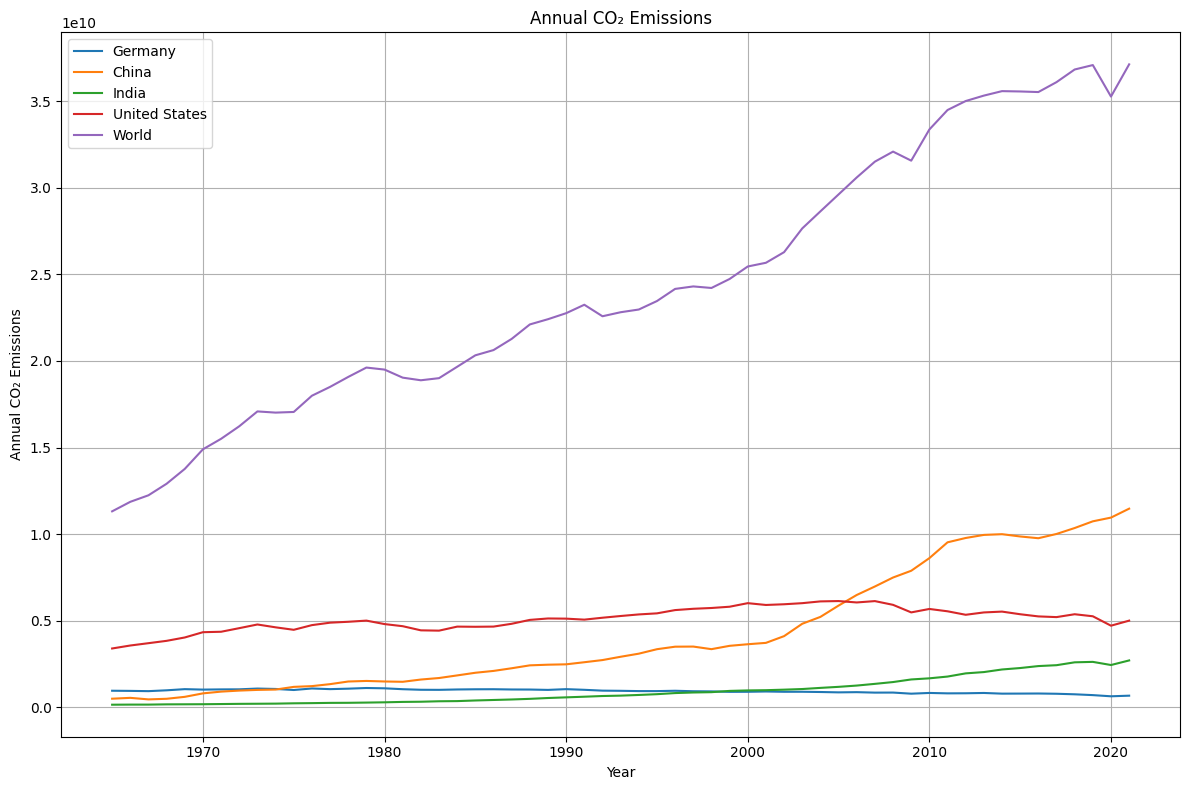

In [3]:
## Easy Testplot
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the desired countries
countries = ['Germany', 'China', 'India', 'United States', 'World']
filtered_df = df_main[df_main.iloc[:, 0].isin(countries)]

# Create a plot
plt.figure(figsize=(12, 8))

# Plot the data for each country
for country in countries:
    country_data = filtered_df[filtered_df.iloc[:, 0] == country]
    plt.plot(country_data.iloc[:, 1], country_data.iloc[:, 3], label=country)

plt.title('Annual CO₂ Emissions')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
## Zeige deskriptive Statistiken
#print(df_main.describe())
#
## Zeige die ersten Zeilen des DataFrames
#print(df_main.head())
#
## Zeige die Datentypen jeder Spalte
#print(df_main.dtypes)
#

In [51]:
## Sample

subset = df_main.iloc[:5, :5]
display(subset)



Column Name,Entity,Year,Code,Annual CO₂ emissions,Renewables (TWh growth - equivalent)
Index,0,1,2,3,4
0,Afghanistan,1965,AFG,1006917.0,NaN
1,Afghanistan,1966,AFG,1091159.0,NaN
2,Afghanistan,1967,AFG,1281865.0,NaN
3,Afghanistan,1968,AFG,1223391.0,NaN
4,Afghanistan,1969,AFG,941232.0,NaN


In [82]:
print(all_countries[:7])


['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda']


In [33]:
df_main.dtypes


Entity                                                                                                          object
Year                                                                                                             int64
Code                                                                                                            object
Annual CO₂ emissions                                                                                           float64
Renewables (TWh growth - equivalent)                                                                           float64
Annual CO₂ emissions from flaring                                                                              float64
Annual CO₂ emissions from gas                                                                                  float64
Annual CO₂ emissions from oil                                                                                  float64
Annual CO₂ emissions from coal                  

In [34]:
print(df_main.columns)


Index(['Entity', 'Year', 'Code', 'Annual CO₂ emissions',
       'Renewables (TWh growth - equivalent)',
       'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from gas',
       'Annual CO₂ emissions from oil', 'Annual CO₂ emissions from coal',
       'Primary energy consumption (TWh)',
       'Change in global mean surface temperature caused by greenhouse gas emissions from fossil fuels and industry',
       'Annual greenhouse gas emissions in CO2 equivalents in tons',
       'Electricity from fossil fuels (TWh)',
       'Other renewables excluding bioenergy (TWh)', 'Oil consumption - TWh',
       'Primary energy consumption per GDP (kWh/$)',
       'Low-carbon electricity (TWh)', 'GDP (constant 2015 US$)',
       'Renewable electricity (% electricity production) (World Bank (2015))',
       'Solar photovoltaic capacity',
       'Annual greenhouse gas emissions in CO2 equivalents', 'Continent',
       'Electricity from wind (TWh)'],
      dtype='object')


In [87]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Presuming df_main is already available
filtered_df = df_main

# Extract unique countries from the dataframe
all_countries = sorted(filtered_df['Entity'].drop_duplicates().astype(str).tolist())

# Set a default list of countries for the user interface
default_countries = ['Germany', 'China', 'India', 'United States', 'World']

# Update list of countries based on user search input
def update_country_list(*args):
    search_input = search_box.value
    # Filtering countries based on search criteria
    updated_countries = [country for country in all_countries if search_input.lower() in country.lower()]
    # Prioritize selected countries to be shown at the top
    updated_countries = sorted(updated_countries, key=lambda x: (x not in default_countries, x))
    
    updated_checkboxes = [widgets.Checkbox(value=(country in default_countries), description=country, layout=widgets.Layout(width="100%", padding="0px")) for country in updated_countries]
    for cb in updated_checkboxes:
        cb.observe(plot_selected_countries, names='value')
    checkboxes_container.children = tuple(updated_checkboxes)

# Creating the search box widget
search_box = widgets.Text(value='', placeholder='Suche nach Ländern...', description='', layout=widgets.Layout(width="95%"))
search_box.observe(update_country_list, names='value')

# Creating country checkboxes widget
country_checkboxes = [widgets.Checkbox(value=(country in default_countries), description=country, layout=widgets.Layout(width="100%", padding="0px")) for country in all_countries]
checkboxes_container = widgets.VBox(country_checkboxes, layout=widgets.Layout(overflow_y="scroll", height="400px", border="1px solid #DDD"))

# Output widget to display the plot
out = widgets.Output(layout=widgets.Layout(height="400px", width="60%"))
out.layout.height = "400px"
checkboxes_container.layout.height = "400px"

# Function to plot data for the selected countries
def plot_selected_countries(change=None):
    # Extracting selected countries based on user checkbox selections
    selected_countries = [cb.description for cb in checkboxes_container.children if cb.value]
    
    # Sort checkboxes to place selected countries on top
    sorted_checkboxes = sorted(checkboxes_container.children, key=lambda cb: (cb.description not in selected_countries, cb.description))
    checkboxes_container.children = tuple(sorted_checkboxes)
    
    with out:
        clear_output(wait=True)
        fig = go.Figure()
        fig_height = 400  
        fig.update_layout(height=fig_height)
        for country in selected_countries:
            country_data = filtered_df[filtered_df['Entity'] == country]
            # Adding trace for each country. The mode 'lines+markers' will display markers at data points.
            fig.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Annual CO₂ emissions'], mode='lines+markers', name=country, showlegend=True))
        
        # Updating layout for the plot with grid and customizing appearance
        fig.update_layout(title='Annual CO₂ Emissions in tonnes', 
                          xaxis=dict(title='Year', 
                                     showgrid=True, 
                                     gridcolor='lightgrey', 
                                     grid_dash="dot"),  # Add dotted grid for x-axis
                          yaxis=dict(title='Annual CO₂ Emissions', 
                                     showgrid=True, 
                                     gridcolor='lightgrey', 
                                     grid_dash="dot"),  # Add dotted grid for y-axis
                          showlegend=True, 
                          xaxis_title='', 
                          plot_bgcolor='white', 
                          paper_bgcolor='white')
        font_size_px = 16

        fig.update_layout(
            font=dict(size=font_size_px),
            title=dict(font=dict(size=font_size_px)),
            xaxis=dict(titlefont=dict(size=font_size_px), tickfont=dict(size=font_size_px)),
            yaxis=dict(titlefont=dict(size=font_size_px), tickfont=dict(size=font_size_px)),
            legend=dict(font=dict(size=font_size_px))
        )

        fig.show()

# Adding listener for change in checkbox selection to update the plot
for cb in country_checkboxes:
    cb.observe(plot_selected_countries, names='value')

left_container = widgets.VBox([search_box, checkboxes_container], layout=widgets.Layout(border="1px solid #DDD", padding="10px 0px 0px 0px"))

display(widgets.HBox([left_container, out]))
plot_selected_countries()
